# Data Analysis

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Data frame

In [2]:
data = pd.read_csv("Search.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  360 non-null    object 
 1   Size       360 non-null    int64  
 2   Time       360 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


,Algorithm,Size,Time
0,BinarySearchI,100,328.0
1,BinarySearchI,100,84.0
2,BinarySearchI,100,34.0
3,BinarySearchI,100,103.0
4,BinarySearchI,100,98.0


#### Partitioning the data

In [3]:
binarySearch = ["BinarySearchI", "BinarySearchR"]
idadeRep = ["IdadeRep", "IdadeRepII"]
algorithms = binarySearch + idadeRep
sizes = [100, 1000, 10000]
means = data.groupby(['Algorithm', 'Size'])['Time'].mean().unstack()
means

Size,100,1000,10000
Algorithm,,,
BinarySearchI,55.433333,83.266667,253.3
BinarySearchR,53.933333,71.733333,139.0
IdadeRep,117.133333,188.500000,1990.8
IdadeRepII,1236.333333,24133.366667,495844.6


#### Bar graphs

##### Binary Search

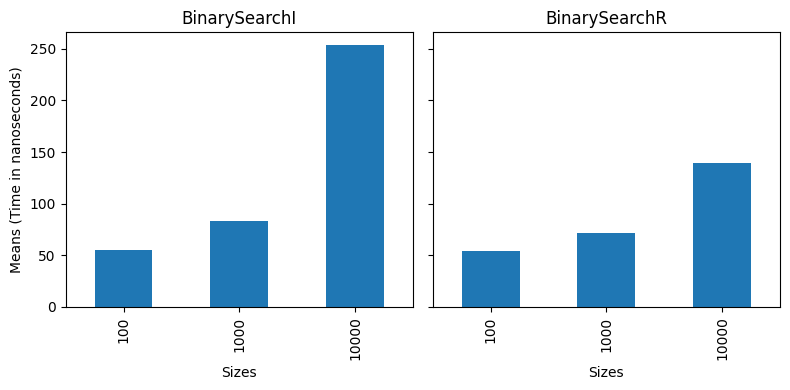

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

for ax, algorithm in zip(axes, binarySearch):
    y_values = means.loc[algorithm]
    y_values.plot(kind='bar', ax=ax, width=0.5)

    ax.set_ylabel('Means (Time in nanoseconds)')
    ax.set_xlabel('Sizes')
    ax.set_title(algorithm)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes)

plt.tight_layout()
plt.show()

##### IdadeRep

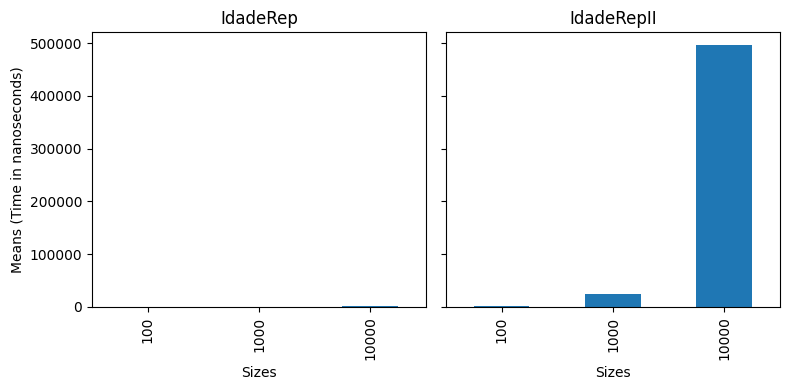

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

for ax, algorithm in zip(axes, idadeRep):
    y_values = means.loc[algorithm]
    y_values.plot(kind='bar', ax=ax, width=0.5)

    ax.set_ylabel('Means (Time in nanoseconds)')
    ax.set_xlabel('Sizes')
    ax.set_title(algorithm)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes)

plt.tight_layout()
plt.show()

##### Size comparison

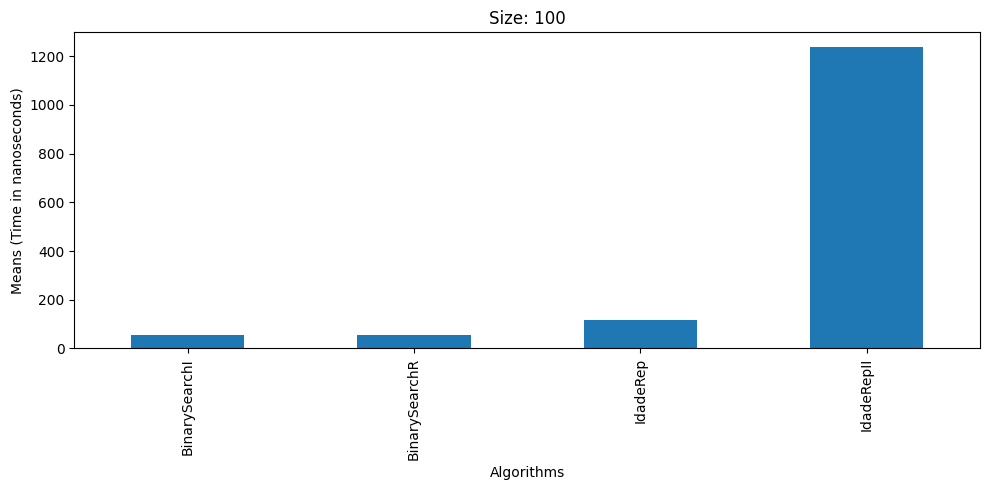

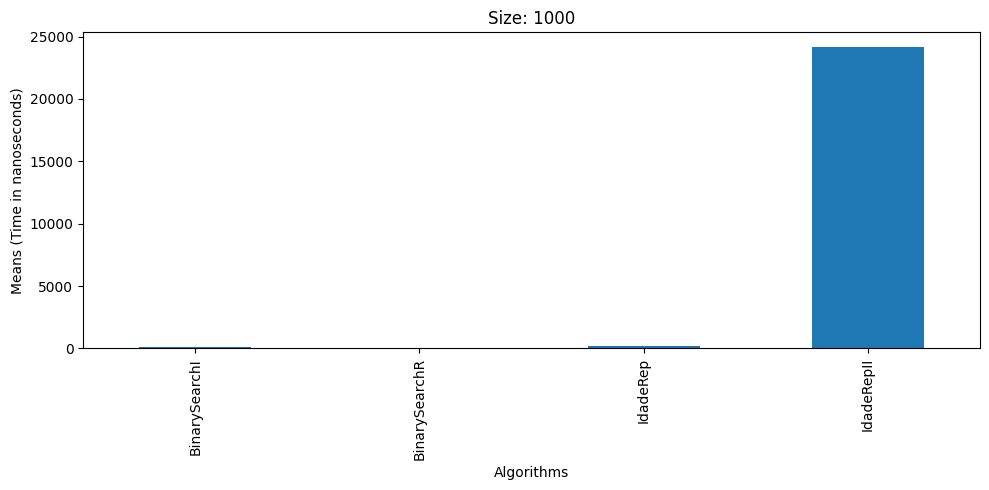

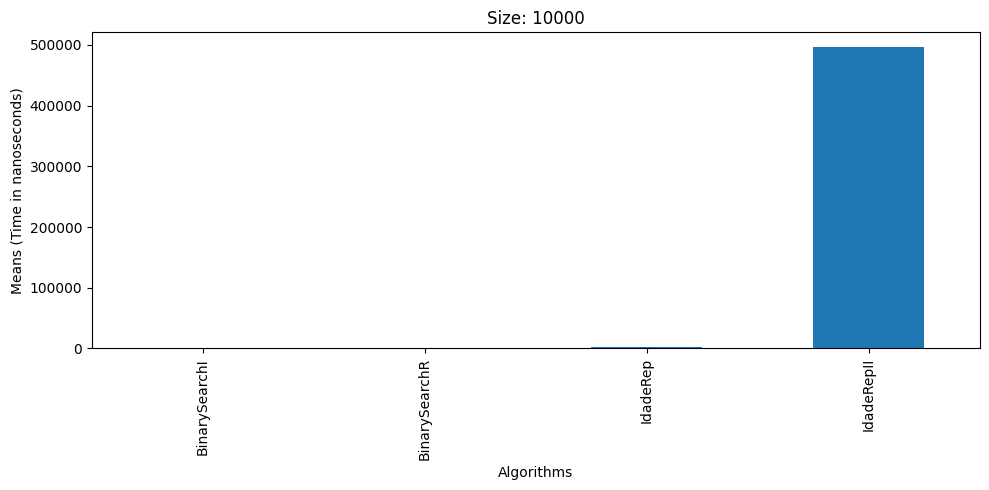

In [6]:
for size in sizes:
    fig, ax = plt.subplots(figsize=(10, 5))
    y_values = means[size]
    y_values.plot(kind='bar', ax=ax, width=0.5)

    ax.set_ylabel('Means (Time in nanoseconds)')
    ax.set_xlabel('Algorithms')
    ax.set_title(f'Size: {size}')
    ax.set_xticks(range(len(algorithms)))
    ax.set_xticklabels(algorithms)

    plt.tight_layout()
    plt.show()
